In [2]:
import pandas as pd
import numpy as np
import tensorflow
from tensorflow import keras
from tensorflow.keras import models, layers
from tensorflow.keras.layers import Dropout
from tensorflow.keras.optimizers import Adam
from keras.preprocessing.image import ImageDataGenerator as Imgen
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
import os.path
from tqdm.notebook import tqdm
import cv2



In [1]:
# !pip install opendatasets tqdm

  Using cached opendatasets-0.1.22-py3-none-any.whl (15 kB)
  Using cached kaggle-1.6.3.tar.gz (84 kB)
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Using cached python_slugify-8.0.1-py2.py3-none-any.whl (9.7 kB)
  Using cached text_unidecode-1.3-py2.py3-none-any.whl (78 kB)
  Created wheel for kaggle: filename=kaggle-1.6.3-py3-none-any.whl size=111932 sha256=d2136d845f6ab190d0ac901e3e6067476e90ff318e23ccdb09bcb89ef6a4b195
  Stored in directory: c:\users\baldo\appdata\local\pip\cache\wheels\86\bc\b2\99460b4db22375a6103c397037ca1689f6cf7e51813e44452d
Successfully built kaggle


In [4]:

import opendatasets as od
od.download("https://www.kaggle.com/datasets/sartajbhuvaji/brain-tumor-classification-mri")


Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username:Your Kaggle Key:Downloading brain-tumor-classification-mri.zip to .\brain-tumor-classification-mri


100%|██████████| 86.8M/86.8M [00:12<00:00, 7.22MB/s]


In [4]:
labels = ['glioma_tumor', 'meningioma_tumor', 'no_tumor', 'pituitary_tumor']
X_train = []
y_train  = []
X_test = []
y_test = []
image_size=128

In [5]:
for label in labels:
    trainPath = os.path.join(r'brain-tumor-classification-mri/Training',label)
    for file in tqdm(os.listdir(trainPath)):
        image = cv2.imread(os.path.join(trainPath, file))
        image = cv2.resize(image, (image_size, image_size))
        X_train.append(image)
        y_train.append(label)
    
    testPath = os.path.join(r'brain-tumor-classification-mri/Testing',label)
    for file in tqdm(os.listdir(testPath)):
        image = cv2.imread(os.path.join(testPath, file))
        image = cv2.resize(image, (image_size, image_size))
        X_test.append(image)
        y_test.append(label)
    
X_train = np.array(X_train)
X_test = np.array(X_test)


  0%|          | 0/826 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/822 [00:00<?, ?it/s]

  0%|          | 0/115 [00:00<?, ?it/s]

  0%|          | 0/395 [00:00<?, ?it/s]

  0%|          | 0/105 [00:00<?, ?it/s]

  0%|          | 0/827 [00:00<?, ?it/s]

  0%|          | 0/74 [00:00<?, ?it/s]

In [6]:
# y_train = 

In [7]:
# import matplotlib.pyplot as plt
# import seaborn as sns

# sns.countplot(y_train)

In [8]:
X_train,X_test,y_train,y_test = train_test_split(X_train,y_train, test_size=0.1,random_state=101)

In [9]:
# one hot encoding
Y_train = []
for i in y_train:
    Y_train.append(labels.index(i))
y_train = Y_train

y_train = tensorflow.keras.utils.to_categorical(y_train)

Y_test = []
for i in y_test:
    Y_test.append(labels.index(i))
y_test = Y_test

y_test = tensorflow.keras.utils.to_categorical(y_test)

In [10]:
datagen = Imgen(
featurewise_center=False,
samplewise_center=False,
featurewise_std_normalization=False,
samplewise_std_normalization=False,
zca_whitening=False,
rotation_range=10,
zoom_range=0.2,
width_shift_range=0.2,
horizontal_flip=False,
vertical_flip=False)

datagen.fit(X_train)

In [11]:
X_train = X_train / 255.0
X_test = X_test / 255.0

In [12]:
model = models.Sequential([
    layers.Conv2D(filters=128, kernel_size=(3, 3), activation='relu', input_shape=(image_size, image_size, 3)),
    layers.MaxPooling2D((2, 2)),
    # layers.BatchNormalization(),
    Dropout(0.30),
    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    # layers.BatchNormalization(),
    Dropout(0.30),
    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    # layers.BatchNormalization(),
    Dropout(0.30),
    # layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu'),
    layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    # layers.BatchNormalization(),
    Dropout(0.30),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    Dropout(0.30),
    # layers.Dense(32, activation='relu'),
    layers.Dense(4, activation='softmax')
])


In [13]:
model.compile(optimizer= Adam(learning_rate= 1e-3), loss= 'categorical_crossentropy', metrics= ['accuracy'])

In [14]:
history = model.fit(X_train, y_train,validation_split=0.10 ,batch_size=64 ,verbose=1,epochs=25)

Epoch 1/25
37/37 [==============================] - 13s 107ms/step - loss: 1.2770 - accuracy: 0.4165 - val_loss: 1.1432 - val_accuracy: 0.5290
Epoch 2/25
37/37 [==============================] - 3s 81ms/step - loss: 0.9999 - accuracy: 0.5830 - val_loss: 0.8663 - val_accuracy: 0.6178
Epoch 3/25
37/37 [==============================] - 3s 79ms/step - loss: 0.8392 - accuracy: 0.6639 - val_loss: 0.7801 - val_accuracy: 0.6757
Epoch 4/25
37/37 [==============================] - 3s 79ms/step - loss: 0.7203 - accuracy: 0.7057 - val_loss: 0.6241 - val_accuracy: 0.7645
Epoch 5/25
37/37 [==============================] - 3s 80ms/step - loss: 0.6579 - accuracy: 0.7272 - val_loss: 0.5871 - val_accuracy: 0.8031
Epoch 6/25
37/37 [==============================] - 3s 79ms/step - loss: 0.5676 - accuracy: 0.7547 - val_loss: 0.5500 - val_accuracy: 0.7876
Epoch 7/25
37/37 [==============================] - 3s 78ms/step - loss: 0.5457 - accuracy: 0.7797 - val_loss: 0.5121 - val_accuracy: 0.8147
Epoch 8/25


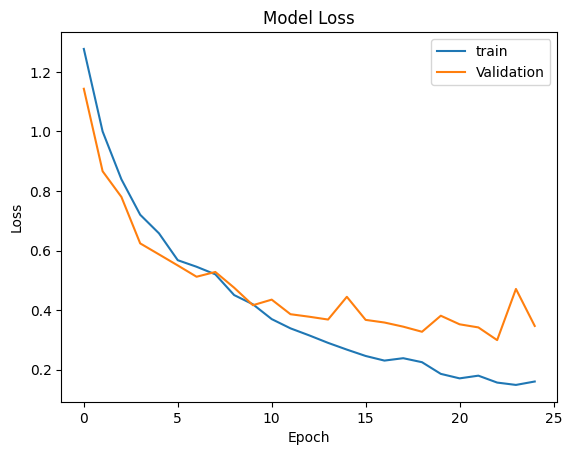

In [19]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'Validation'], loc='upper right')
plt.show()

<Figure size 640x480 with 0 Axes>

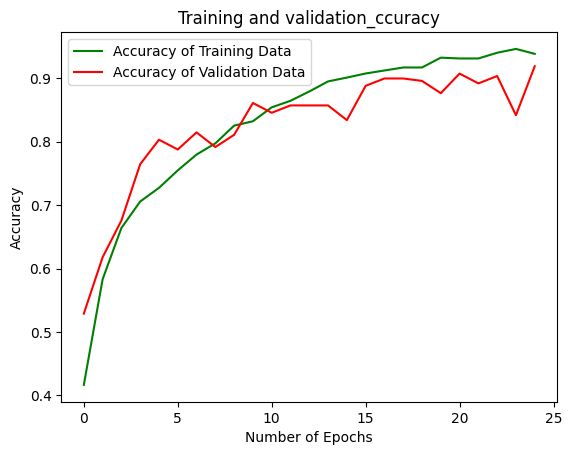

<Figure size 640x480 with 0 Axes>

In [20]:
epochs = range(len(history.history['accuracy']))

plt.plot(epochs, history.history['accuracy'], 'g', label='Accuracy of Training Data')
plt.plot(epochs, history.history['val_accuracy'], 'r', label='Accuracy of Validation Data')
plt.xlabel('Number of Epochs')
plt.ylabel('Accuracy')
plt.title('Training and validation_ccuracy')
plt.legend(loc=0)
plt.figure()


In [21]:
from sklearn.metrics import classification_report, confusion_matrix,accuracy_score
from sklearn import metrics
predictions = model.predict(X_test, batch_size= 64)
predictions = np.argmax(predictions, axis= 1)
actuals = np.argmax(y_test, axis= 1)

testing_accuracy = metrics.accuracy_score(actuals, predictions)
testing_accuracy



5/5 [==============================] - 0s 89ms/step


0.8954703832752613

Text(58.222222222222214, 0.5, 'Truth')

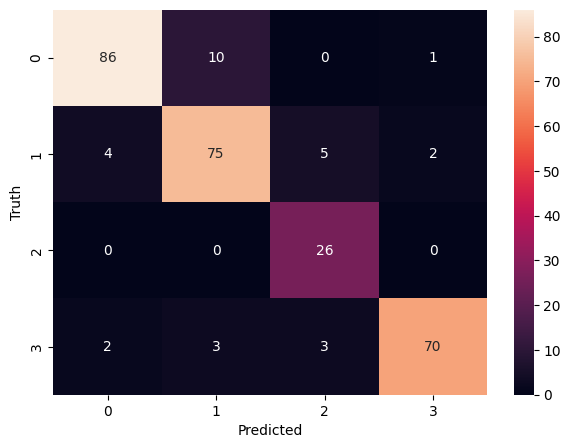

In [22]:
#cm in visual
cm = confusion_matrix(actuals, predictions)
import seaborn as sn
plt.figure(figsize = (7,5))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')


In [23]:
print(classification_report(actuals, predictions, target_names= labels))


                  precision    recall  f1-score   support

    glioma_tumor       0.93      0.89      0.91        97
meningioma_tumor       0.85      0.87      0.86        86
        no_tumor       0.76      1.00      0.87        26
 pituitary_tumor       0.96      0.90      0.93        78

        accuracy                           0.90       287
       macro avg       0.88      0.91      0.89       287
    weighted avg       0.90      0.90      0.90       287

